In [11]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:

df = pd.read_csv(r"D:\Sem 4\ML LABS\DataSets\occupancy_train.txt")
tdf = pd.read_csv(r"D:\Sem 4\ML LABS\DataSets\occupancy_test.txt")
display(df)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


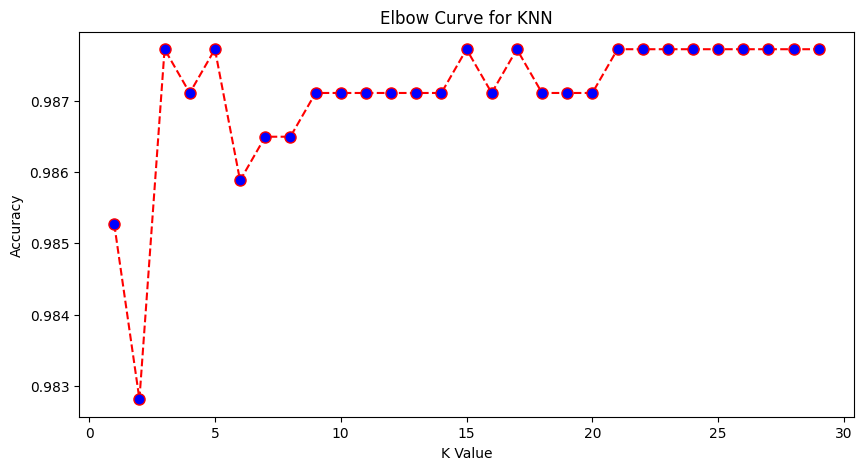

In [14]:
X = df[["Humidity","Light","HumidityRatio"]]
Y = df.pop("Occupancy")

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
acc = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    acc.append(accuracy_score(Y_test,Y_pred))
    

plt.figure(figsize=(10,5))
plt.plot(range(1,30), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Elbow Curve for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

    

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(f"Traning Accuracy : {accuracy_score(Y_test,Y_pred)}")

Traning Accuracy : 0.9877225291589933


In [ ]:
TX = tdf[["Humidity","Light","HumidityRatio"]]
TY = tdf.pop("Occupancy")
TY_pred= knn.predict(TX)
print(f"Testing Accuracy : {accuracy_score(TY,TY_pred)}")

Testing Accuracy : 0.9549718574108818


In [17]:
index = 0
max_acc = -1
for i in range(0,29):
    if max_acc < acc[i]:
        max_acc = acc[i]
        index = i
    
print(f"Max Accuracy : {max_acc} And K : {index+1}")


Max Accuracy : 0.9877225291589933 And K : 3
